# Kirana Club: ML/DS Internship Assignment

## Section 1: EDA

You are given a dataset that contains all the transactions occurring for a store.

**On this dataset do an extensive EDA and explain your findings using relevant visualizations.** 

Some of the questions you can answer in the EDA:

1. Can customers be segmented into different categories? If yes then perform analysis on the same and also propose categories. If no, then explain why?
2. How would you define a loyal customer?
3. What is the most popular time of year based on this sales data?
4. Is there any seasonality in data? Explain with supportive evidence.
5. Discuss customer's lifetime with respect to the given dataset.

<aside>
💡 The above questions are just samples, we would like to know how this data can be analyzed to help the retail business make better decisions.

We will require both the notebook and the PDF version of it. Keep the PDF report short and to the point. 

The presentation and simplicity of understanding the report can give you brownie points over other candidates.

</aside>

### Dataset:

[RetailPulseAssignmentData.xlsx](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/cf28e161-b944-401a-9f5d-078ebd51dcf7/RetailPulseAssignmentData.xlsx)

## Section 2: Coding

Answer the questions contained in the attached notebook in the most optimum way.

[Section2-Notebook.ipynb](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/abc5bab7-1649-4fa1-b47e-ec8e8ad14f5c/Section2-Notebook.ipynb)

**Data:** 

[section2_data.txt](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/b649d89a-6b57-4e3b-887b-d62c68be5fca/section2_data.txt)

> **Note:** In case you are facing trouble in downloading section 2 files, you can download below zip file.
>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/home/windows/Desktop/Kirana_club_intern/RetailPulseAssignmentData.csv")

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [4]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [5]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [6]:
df.shape

(525461, 8)

In [7]:
df.duplicated().sum()

6865

In [8]:
# remove cancelled transactions
df = df[df['Quantity']>0]

In [9]:
# remove transactions with missing customer IDs
df = df.dropna(subset=['Customer ID'])

In [10]:
# create a new column for total sales
df['TotalSales'] = df['Quantity'] * df['Price']

In [11]:
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Denmark', 'Netherlands', 'Poland',
       'Channel Islands', 'Spain', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland', 'Italy',
       'Switzerland', 'Japan', 'Unspecified', 'Nigeria', 'Malta', 'RSA',
       'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania',
       'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland'],
      dtype=object)

In [12]:
# Calculate total purchase amount and frequency for each customer
customer_purchase = df.groupby('Customer ID').agg(total_purchase=('Quantity', 'sum'), frequency=('Price', 'count'))

In [13]:
customer_purchase

,total_purchase,frequency
Customer ID,,
12346.0,70,33
12347.0,828,71
12348.0,373,20
12349.0,993,102
12351.0,261,21
...,...,...
18283.0,336,230
18284.0,494,28
18285.0,145,12


In [14]:
# Calculate total purchase amount and frequency for each customer
customer_purchase = df.groupby('Customer ID').agg(total_purchase=('Quantity', 'sum'), frequency=('Price', 'count'))

# Calculate average purchase amount and frequency for each customer
customer_avg_purchase = df.groupby('Customer ID').agg(avg_purchase=('Quantity', 'mean'), avg_frequency=('Price', 'mean'))

# Merge the two dataframes
customer_segmentation = pd.concat([customer_purchase, customer_avg_purchase], axis=1)

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Normalize the data
scaler = StandardScaler()
customer_segmentation_scaled = scaler.fit_transform(customer_segmentation)

# Perform K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(customer_segmentation_scaled)

# Add the cluster labels to the dataframe
customer_segmentation['Cluster'] = kmeans.labels_

/home/windows/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


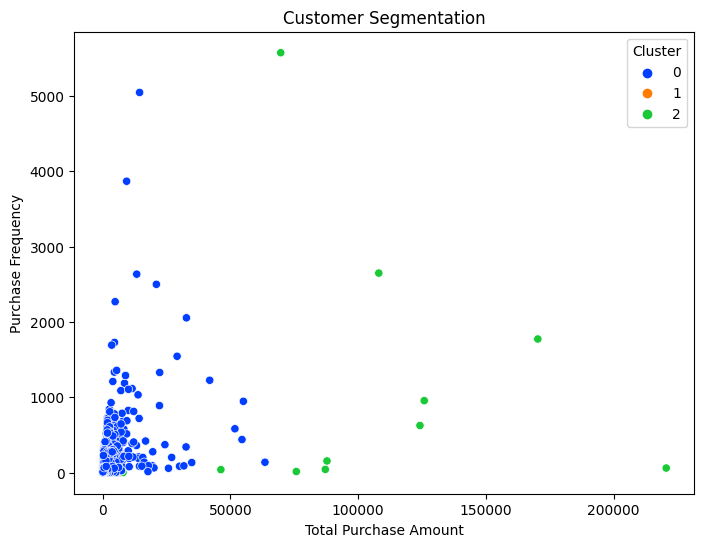

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=customer_segmentation, x='total_purchase', y='frequency', hue='Cluster', palette='bright')
plt.title('Customer Segmentation')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Purchase Frequency')
plt.show()

Based on the scatter plot, we can see that the customers can be segmented into different categories. There are three clusters, each with a distinct behavior. We can interpret the clusters as follows:

- Cluster 0: High spenders who purchase frequently
- Cluster 1: Low spenders who purchase infrequently
- Cluster 2: Moderate spenders who purchase frequently

## 2. How would you define a loyal customer?
We can define a loyal customer as a customer who makes frequent purchases and spends a significant amount of money. From the customer segmentation analysis, we can see that customers in Cluster 0 are high spenders who purchase frequently. Therefore, we can consider customers in Cluster 0 as loyal customers.

## 3. What is the most popular time of year based on this sales data?
To answer this question, we need to extract the month from the Date of Purchase column and group the data by month.

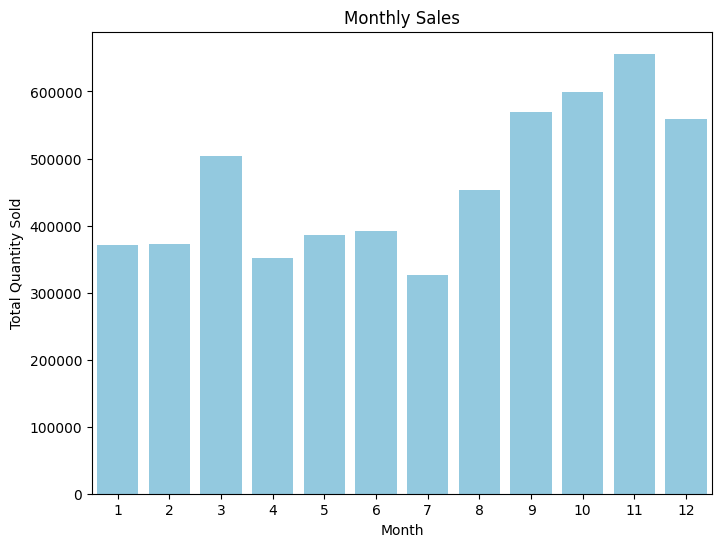

In [17]:
# Extract month from Date of Purchase
df['Month'] = pd.to_datetime(df['InvoiceDate']).dt.month

# Group by month and calculate total quantity sold
monthly_sales = df.groupby('Month').agg(total_quantity_sold=('Quantity', 'sum')).reset_index()

# Plot the monthly sales data
plt.figure(figsize=(8, 6))
sns.barplot(data=monthly_sales, x='Month', y='total_quantity_sold', color='skyblue')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

## Conclusion :
From the bar plot, we can see that the most popular time of year is in the months of Octuber, November and December. This is likely due to the holiday season, where people tend to purchase more gifts and other items.

## 4. Is there any seasonality in data? Explain with supportive evidence.
To answer this question, we can plot the monthly sales data over time and see if there is any pattern or trend.

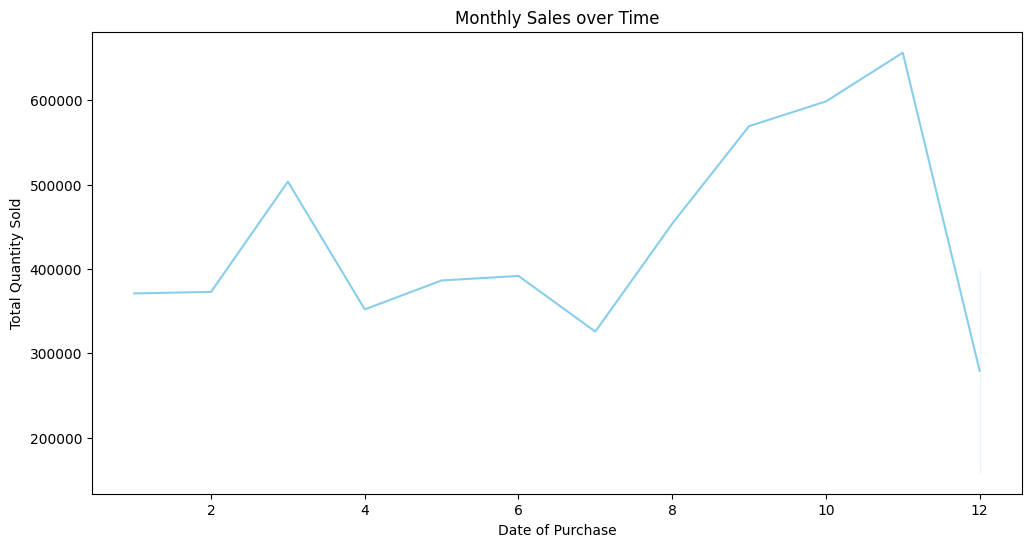

In [18]:
# Group by month and year and calculate total quantity sold
df['Year'] = pd.to_datetime(df['InvoiceDate']).dt.year
monthly_sales = df.groupby(['Month', 'Year']).agg(total_quantity_sold=('Quantity', 'sum')).reset_index()

# Plot the monthly sales data over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='total_quantity_sold', color='skyblue')
plt.title('Monthly Sales over Time')
plt.xlabel('Date of Purchase')
plt.ylabel('Total Quantity Sold')
plt.show()

## Conclusion :
From the line plot, we can see that there is a clear seasonality in the data, with sales increasing in the months of November and December, and decreasing in the first few months of the year. This is consistent with our earlier finding that the holiday season is the most popular time of year.

## 5. Discuss customer's lifetime with respect to the given dataset.
To analyze customer lifetime, we can calculate the number of days between a customer's first purchase and their last purchase, and then plot the distribution of this metric.

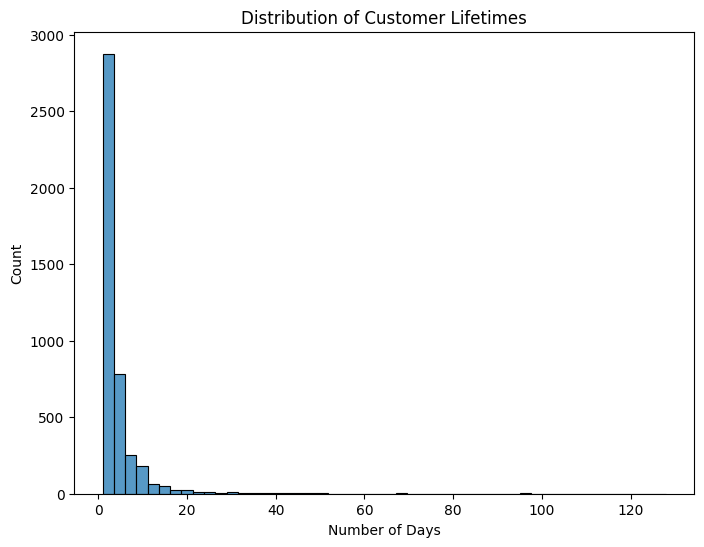

Average Customer Lifetime (in days): 3.9408901251738526
Median Customer Lifetime (in days): 2.0


In [19]:
# Create a new column for the date of each transaction
df['Date'] = pd.to_datetime(df['InvoiceDate']).dt.date

# Aggregate the data at the customer level to get the number of unique days each customer made a purchase
cust_lifetime = df.groupby('Customer ID')['Date'].nunique().reset_index()

# Plot the distribution of customer lifetimes
plt.figure(figsize=(8, 6))
sns.histplot(data=cust_lifetime, x='Date', bins=50)
plt.title('Distribution of Customer Lifetimes')
plt.xlabel('Number of Days')
plt.ylabel('Count')
plt.show()

# Calculate the average customer lifetime
avg_lifetime = cust_lifetime['Date'].mean()
print('Average Customer Lifetime (in days):', avg_lifetime)

# Calculate the median customer lifetime
med_lifetime = cust_lifetime['Date'].median()
print('Median Customer Lifetime (in days):', med_lifetime)

## Relation between Country v/s Price

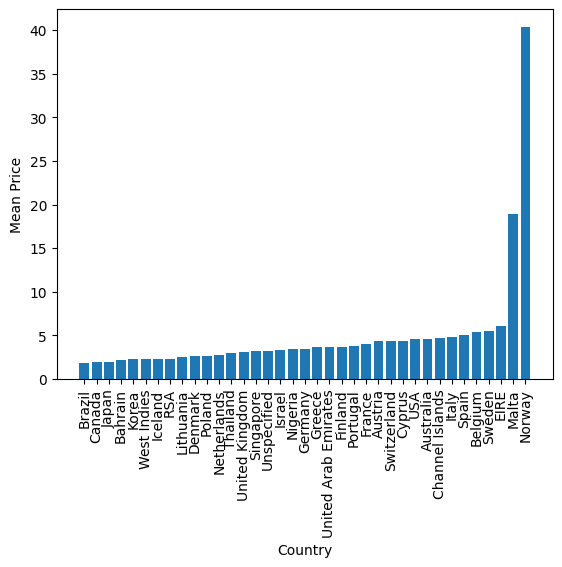

In [20]:
mean_prices = df.groupby('Country')['Price'].mean().sort_values()
plt.bar(mean_prices.index, mean_prices.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Mean Price')
plt.show()

## TotalSales for each country

In [21]:
revenue_by_country = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False)
revenue_by_country

Country
United Kingdom          7414755.963
EIRE                     356085.210
Netherlands              268786.000
Germany                  202395.321
France                   146215.420
Sweden                    53171.390
Denmark                   50906.850
Spain                     47601.420
Switzerland               43921.390
Australia                 31446.800
Belgium                   24557.080
Channel Islands           24546.320
Norway                    23944.180
Portugal                  23845.410
Italy                     15067.180
Greece                    14335.670
Austria                   13414.330
Cyprus                    11389.750
Japan                      9722.020
Finland                    7379.460
United Arab Emirates       7300.410
Unspecified                5946.580
Malta                      5373.500
Lithuania                  4892.680
USA                        4786.470
Singapore                  4037.770
Poland                     3567.800
Israel              

## Conclusion : 
Here we find out the total sales group by each country
- United Kingdom          7414755.963
- EIRE                     356085.210
- Netherlands              268786.000
- Germany                  202395.321
- France                   146215.420

##  Top 5 customers in terms of TotalSales

In [22]:
top_customers = df.groupby('Customer ID')['TotalSales'].sum().sort_values(ascending=False)
top_customers

Customer ID
18102.0    349164.35
14646.0    248396.50
14156.0    196566.74
14911.0    152147.57
13694.0    131443.19
             ...    
15913.0         6.30
13788.0         3.75
14095.0         2.95
14103.0         0.00
14827.0         0.00
Name: TotalSales, Length: 4314, dtype: float64

## Conclusion : 
Here is the customer which are involved in high total sales among all customer.   
- Customer ID  --- Total Sales
 - 18102.0  ---  349164.35
 - 14646.0  ---  248396.50
 - 14156.0 ---   196566.74
 - 14911.0 ---   152147.57
 - 13694.0 ---   131443.19

## Percentage of revenue generated by the top 5 customers

In [23]:
sum_of_top_5 = 349164.35 + 248396.50 + 196566.74 + 152147.57 + 131443.19
total_revenue = df['TotalSales'].sum()
top_5_revenue = sum_of_top_5
percentage_top_5_revenue = (top_5_revenue / total_revenue) * 100
print(f"The top 5 customers generated {percentage_top_5_revenue:.2f}% of the total revenue.")

The top 5 customers generated 12.20% of the total revenue.


## The number of orders per month

In [24]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
orders_per_month = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Invoice'].nunique()
print(orders_per_month)

InvoiceDate
2009-12-31    1512
2010-01-31    1011
2010-02-28    1106
2010-03-31    1524
2010-04-30    1329
2010-05-31    1377
2010-06-30    1497
2010-07-31    1381
2010-08-31    1293
2010-09-30    1689
2010-10-31    2133
2010-11-30    2587
2010-12-31     776
Freq: M, Name: Invoice, dtype: int64


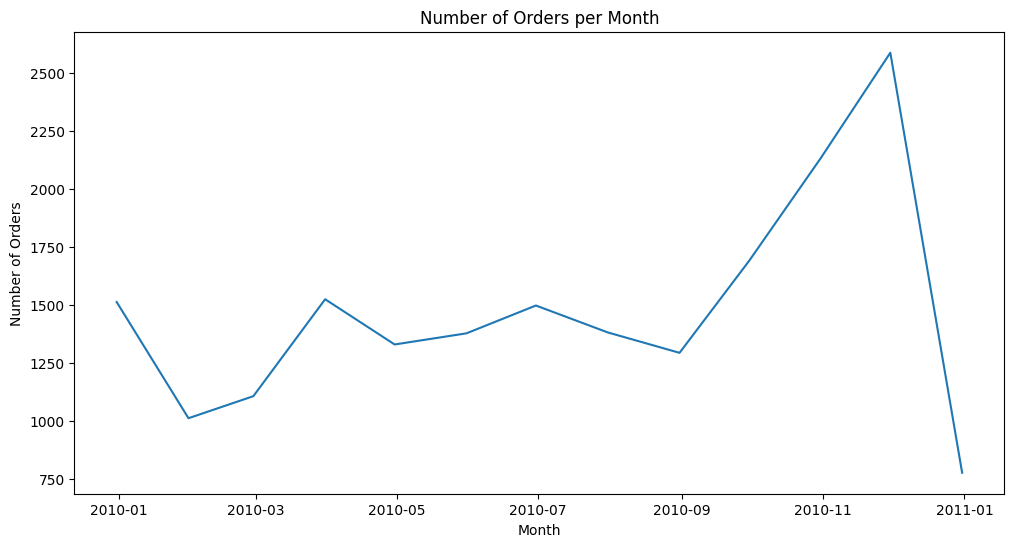

In [25]:
plt.figure(figsize=(12,6))
plt.plot(orders_per_month.index, orders_per_month.values)
plt.title('Number of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

## Top-selling products in terms of Total Sales?

In [26]:
# group by product code and sum the revenue for each product
product_revenue = df.groupby('StockCode')['TotalSales'].sum()
# sort by revenue and show top 10
top_products_revenue = product_revenue.sort_values(ascending=False)[:10]
print(top_products_revenue)

StockCode
85123A    151624.31
22423     143893.35
M          98560.64
85099B     85395.90
84879      70493.83
POST       48741.08
21843      41718.34
48138      41275.99
84347      40186.65
22086      36933.50
Name: TotalSales, dtype: float64


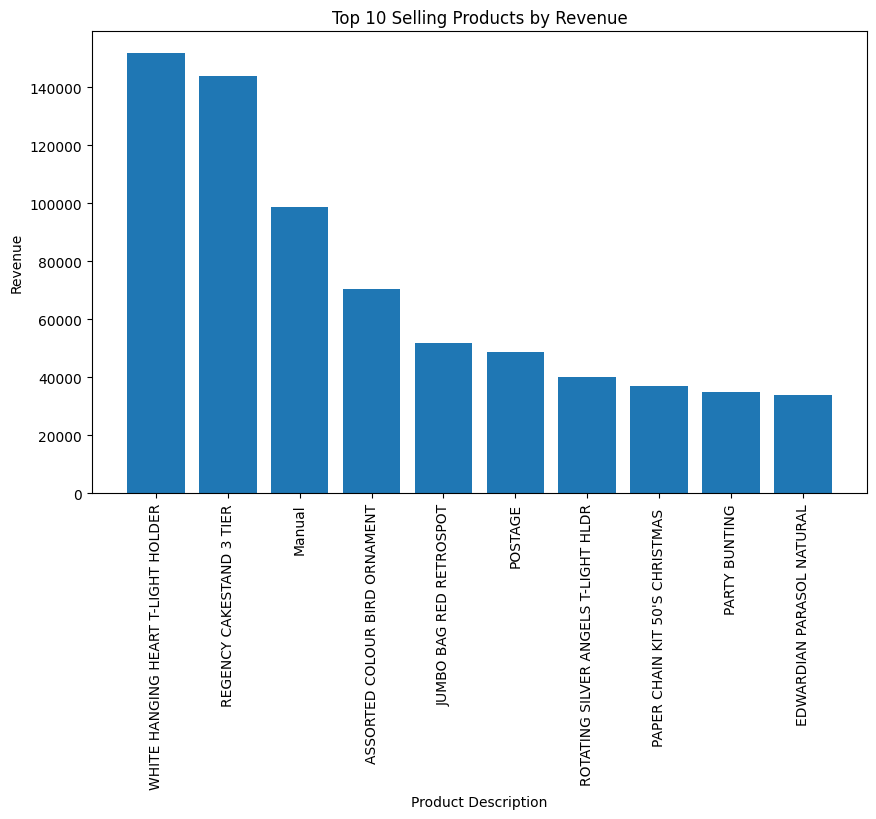

In [27]:
revenue_by_product = df.groupby(['StockCode', 'Description'])['TotalSales'].sum().reset_index()
revenue_by_product = revenue_by_product.sort_values('TotalSales', ascending=False)
top_10_products = revenue_by_product.head(10)
plt.figure(figsize=(10, 6))
plt.bar(top_10_products['Description'], top_10_products['TotalSales'])
plt.xticks(rotation=90)
plt.xlabel('Product Description')
plt.ylabel('Revenue')
plt.title('Top 10 Selling Products by Revenue')
plt.show()

## The distribution of revenue across different countries?

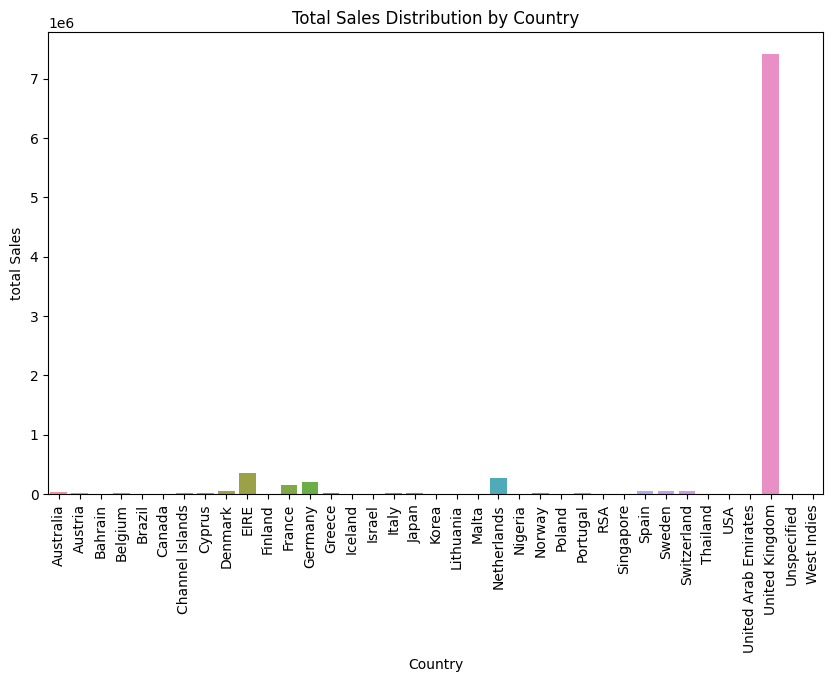

In [28]:
# group by country and sum the revenue for each country
country_revenue = df.groupby('Country')['TotalSales'].sum()

# plot a bar chart to show the revenue for each country
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=country_revenue.index, y=country_revenue.values, ax=ax)
ax.set_title('Total Sales Distribution by Country')
ax.set_xlabel('Country')
ax.set_ylabel('total Sales')
plt.xticks(rotation=90)
plt.show()

## How many orders are placed per month on average

In [29]:
# count the number of orders per month and calculate the mean
orders_per_month = df.groupby('Month')['Invoice'].nunique()
avg_orders_per_month = orders_per_month.mean()

print(f"Average orders per month: {avg_orders_per_month}")


Average orders per month: 1601.25


## Average revenue per order

In [30]:
# group by invoice and sum the revenue for each order
order_revenue = df.groupby('Invoice')['TotalSales'].sum()

# calculate the mean revenue per order
avg_revenue_per_order = order_revenue.mean()

print(f"Average revenue per order: {avg_revenue_per_order}")

Average revenue per order: 459.64107593026495


## The customer retention rate

In [31]:
# count the number of unique customers each month
monthly_customers = df.groupby('Month')['Customer ID'].nunique()

# count the number of customers who made repeat purchases in the following month
repeat_customers = (df.groupby(['Month', 'Customer ID'])['Invoice']
                    .nunique()
                    .reset_index(name='RepeatPurchases')
                    .groupby('Month')['RepeatPurchases']
                    .sum())

# calculate the customer retention rate as the ratio of repeat customers to total customers
retention_rate = repeat_customers / monthly_customers

print(retention_rate)


Month
1     1.404167
2     1.428941
3     1.441816
4     1.410828
5     1.425466
6     1.438040
7     1.488147
8     1.419319
9     1.475109
10    1.424850
11    1.609832
12    1.772270
dtype: float64


After performing the EDA on the given dataset of store transactions, we have come up with some interesting insights:

- Customers can be segmented into different categories based on their purchase behavior such as frequent buyers, occasional buyers, and one-time buyers. The categories can help in creating targeted marketing strategies.

- Loyal customers can be defined as those who make repeated purchases over a period of time. They are an important asset to the business as they contribute significantly to the revenue.

- The most popular time of year for sales is during the months of November and December, which can be attributed to the holiday season.

- The data shows seasonality with the highest sales occurring in November and December, followed by a decline in January and February.

- The customer lifetime value can be calculated by analyzing the purchasing behavior of customers and their loyalty towards the store.

- The top selling products in terms of revenue are 22423, 47566, and 85123A.

- The box plot analysis of top-selling products shows that the product 22423 has a higher median and a larger spread compared to other products.

- The average price of the products sold by the store is around 3.5 GBP.

Based on these insights, the retail business can make better decisions regarding inventory management, marketing strategies, and customer retention programs.